In [19]:
wd <- dirname(getwd())
source(paste0(wd,"/mission_control/treasure_map.R"))
source(paste0(wd,"/mission_control/clinical_help.R"))

library(dplyr)
library(tidyr)

#### 0 - read in clinical data with dups 

In [20]:
clinical <- read.csv(paste0( TMP_DIR,'clinical_short.csv'), header=TRUE, sep = ",", stringsAsFactors=FALSE)

In [68]:
cpi$chemo_treatments <- unname(sapply(cpi$ID_pre_type, function(i) length(strsplit(i, "Chemotherapy")[[1]])))

In [98]:
table(cpi$chemo_treatments)


  0   1   2   3   4   5   6   7   8  18 
239  79 110  39  24   6   2   2   5   1 

In [170]:
cpi$a <- ifelse( is.na(cpi$ID_pre_to_post_treatment_time), 10000, cpi$ID_pre_to_post_treatment_time)
cpi$b <- ifelse( cpi$a > 183, 1, 2)
cpi$c <- ifelse( cpi$clinical_meta_hasSystemicPreTreatment == "Yes", 10, cpi$b)

In [171]:
cpi$tmp <- apply( cpi 
          %>% select(ID_pre_to_post_treatment_time,
                     clinical_meta_hasSystemicPreTreatment ),1,
      list)

In [172]:
unname(cpi$tmp[[1]][[1]][2])

[1] "Yes"

In [173]:
cpi$test <- unlist(lapply(cpi$tmp, pre_treater)); table(cpi$test)


  0   1   2 
239 102 166 

In [180]:
table(cpi$clinical_meta_hasSystemicPreTreatment)


 No Yes 
239 268 

In [197]:
pre_treater <- function(a){
    
    pre_to_post_treatment_time <- as.numeric(a[[1]][1])
    pre_treated <- unname(a[[1]][2])
    
    #print(pre_to_post_treatment_time)
    #print(is.na(pre_to_post_treatment_time))
    if(pre_treated == "No"){
        0
    } else if ( is.na(pre_to_post_treatment_time) ){
        2
    } else if (pre_to_post_treatment_time > 365){
        1
    } else if (pre_to_post_treatment_time > 183){
        2
    } else {
        3
    }
    
}

In [198]:
cpi$test <- unlist(lapply(cpi$tmp, pre_treater)); table(cpi$test)


  0   1   2   3 
239  52  53 163 

In [199]:
#summary(glm( Y_best_response_binary ~ test + clinical_tumor_location_group, data = cpi, family = "binomial"))
summary(glm( Y_best_response_binary ~ test + clinical_tumor_location_group, data = cpi, family = "binomial"))
summary(glm( Y_best_response_binary ~ clinical_meta_hasSystemicPreTreatment + clinical_tumor_location_group, data = cpi, family = "binomial"))

#summary(lm( ID_pre_to_post_treatment_time ~ as.factor(Y_best_response_binary), data = cpi))
#summary(lm( log(ID_pre_treatment_duration+1) ~ as.factor(Y_best_response_binary), data = cpi))
#summary(lm( number_treatments ~ as.factor(Y_best_response_binary) + clinical_meta_hasSystemicPreTreatment, data = cpi))
#summary(lm( chemo_treatments ~ as.factor(Y_best_response_binary), data = cpi))


Call:
glm(formula = Y_best_response_binary ~ test + clinical_tumor_location_group, 
    family = "binomial", data = cpi)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2479  -1.0050  -0.5979   1.3171   2.3025  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                     0.1643     0.2713   0.606
test                                           -0.5443     0.1017  -5.354
clinical_tumor_location_groupOther             -1.1089     0.3807  -2.913
clinical_tumor_location_groupSkin              -0.4868     0.2969  -1.640
clinical_tumor_location_groupUrothelial tract  -0.1625     0.3310  -0.491
                                              Pr(>|z|)    
(Intercept)                                    0.54481    
test                                          8.59e-08 ***
clinical_tumor_location_groupOther             0.00358 ** 
clinical_tumor_location_groupSkin              0.10108    
clinical_t


Call:
glm(formula = Y_best_response_binary ~ clinical_meta_hasSystemicPreTreatment + 
    clinical_tumor_location_group, family = "binomial", data = cpi)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2619  -0.8314  -0.7103   1.3104   2.1618  

Coefficients:
                                              Estimate Std. Error z value
(Intercept)                                    0.19638    0.28266   0.695
clinical_meta_hasSystemicPreTreatmentYes      -1.35052    0.26443  -5.107
clinical_tumor_location_groupOther            -1.08103    0.37866  -2.855
clinical_tumor_location_groupSkin             -0.50379    0.30334  -1.661
clinical_tumor_location_groupUrothelial tract -0.09431    0.32912  -0.287
                                              Pr(>|z|)    
(Intercept)                                    0.48720    
clinical_meta_hasSystemicPreTreatmentYes      3.27e-07 ***
clinical_tumor_location_groupOther             0.00431 ** 
clinical_tumor_location_groupSkin   

In [79]:
cpi$test <- ifelse(is.na(cpi$ID_pre_to_post_treatment_time), 365*5, cpi$ID_pre_to_post_treatment_time)

In [159]:
(cpi 
    %>% group_by(Y_best_response_binary)
    %>% summarise( mean(ID_pre_to_post_treatment_time, na.rm = TRUE), 
                   sd(ID_pre_to_post_treatment_time, na.rm = TRUE), 
                   median(ID_pre_to_post_treatment_time, na.rm = TRUE)
                  )
)

Y_best_response_binary,"mean(ID_pre_to_post_treatment_time, na.rm = TRUE)","sd(ID_pre_to_post_treatment_time, na.rm = TRUE)","median(ID_pre_to_post_treatment_time, na.rm = TRUE)"
0,198.7630,215.0141,139
1,398.9592,604.7637,196
NA,150.0000,186.4832,102


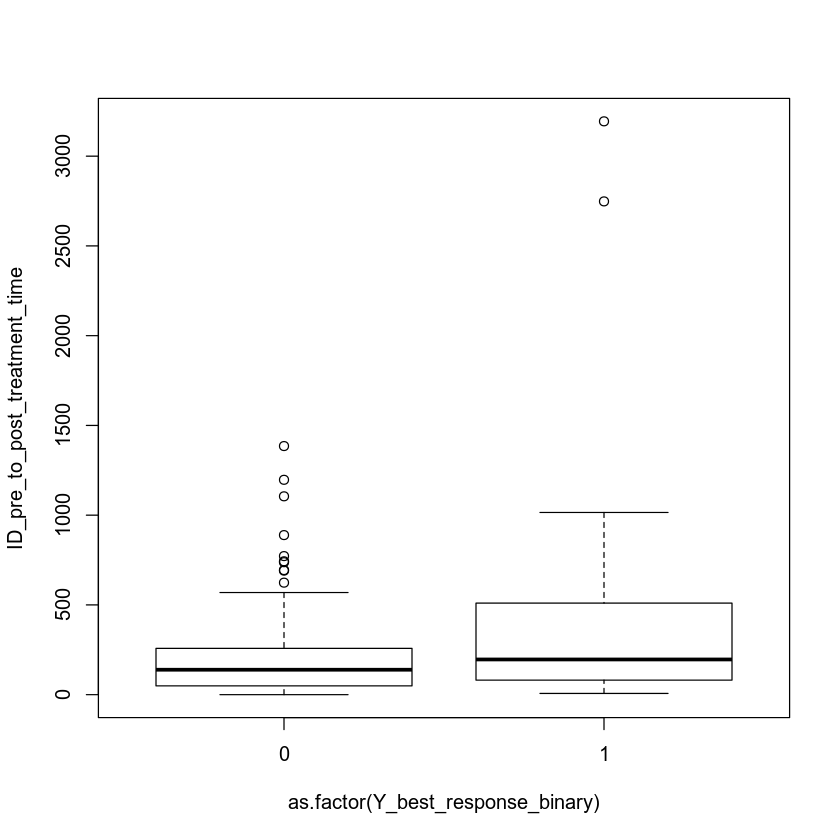

In [111]:
boxplot( ID_pre_to_post_treatment_time ~ as.factor(Y_best_response_binary), data = cpi)

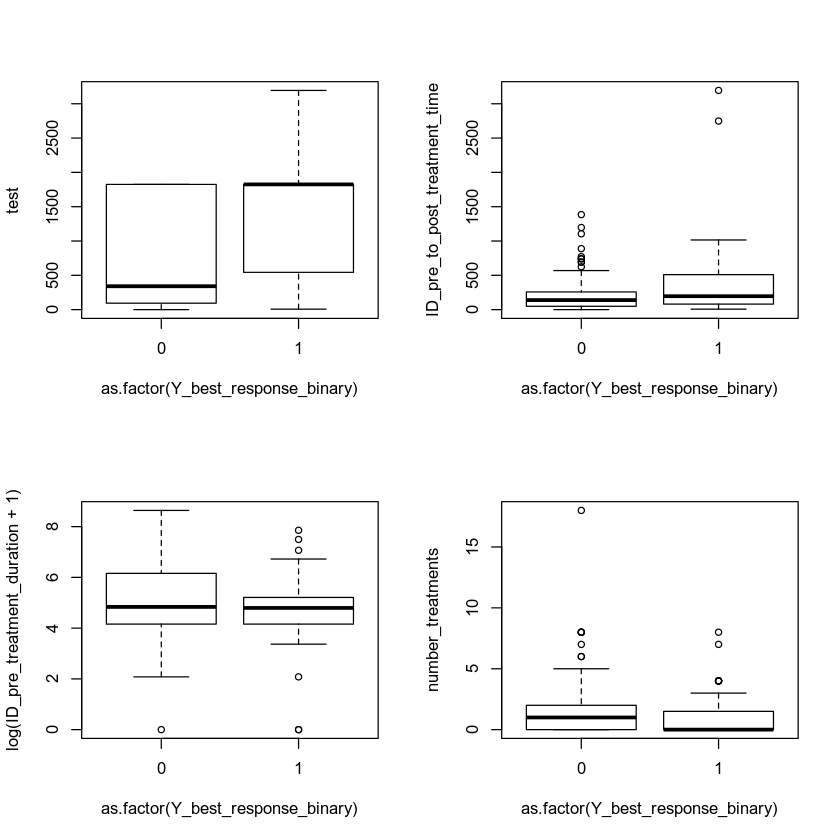

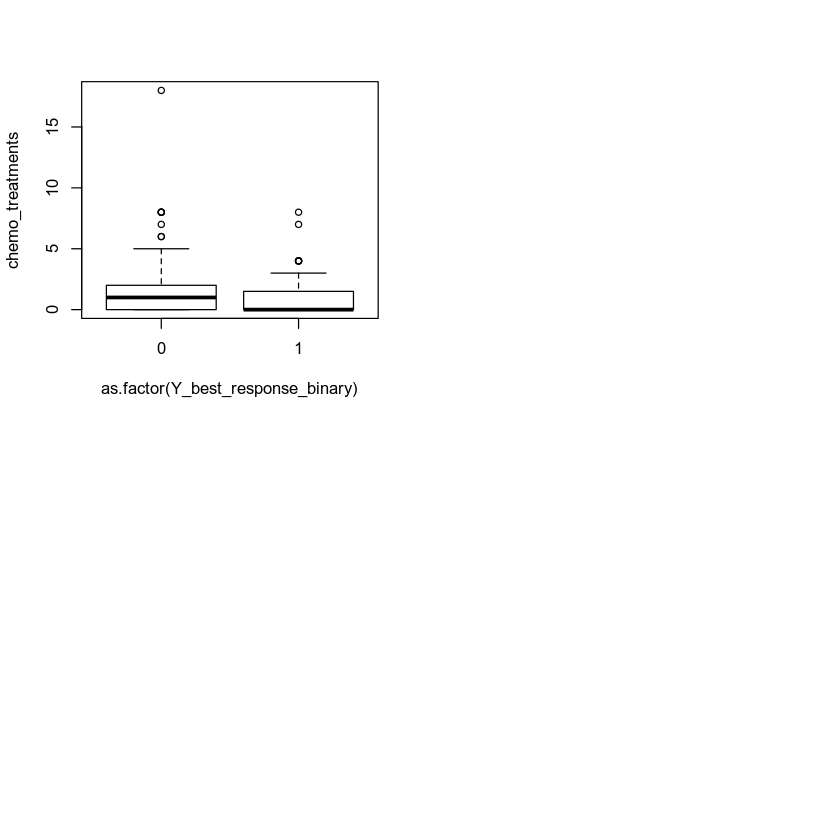

In [80]:
par(mfrow = c(2,2))
boxplot( test ~ as.factor(Y_best_response_binary), data = cpi)
boxplot( ID_pre_to_post_treatment_time ~ as.factor(Y_best_response_binary), data = cpi)
boxplot( log(ID_pre_treatment_duration+1) ~ as.factor(Y_best_response_binary), data = cpi)
boxplot( number_treatments ~ as.factor(Y_best_response_binary), data = cpi)
boxplot( chemo_treatments ~ as.factor(Y_best_response_binary), data = cpi)

#### 1 - De-dup CPI patient data 

In [23]:
cpi <- (
    clinical 
        %>% filter(clinical_post_contains_Immunotherapy == "True")
        %>% group_by(patientIdentifier) 
        %>% mutate(ct = n(), sample_order = rank(sampleId)) 
        %>% ungroup()
        %>% arrange(patientIdentifier)
)  
non_dup <- cpi %>% filter( ct == 1) %>% select(-ct, -sample_order)
keep_samples <- c("CPCT02010503TII", "CPCT02020670T", "CPCT02020958TII", "CPCT02050073TII", "CPCT02050276TII", "CPCT02080266T")
dup <- cpi %>% filter(sampleId %in% keep_samples) %>% select(-ct, -sample_order)
cpis <- rbind(non_dup, dup)

#### 2 - De-dup non-CPI patients

In [4]:
non_cpis <- (
    clinical 
        %>% filter(clinical_post_contains_Immunotherapy != "True", 
                   !(patientIdentifier %in% cpi$patientIdentifier))
        %>% group_by(patientIdentifier) 
        %>% mutate(sample_order = rank(desc(sampleId)) )
        %>% ungroup()
        %>% filter(sample_order == 1)
        %>% select(-sample_order))

In [5]:
clinical <- rbind(cpis,non_cpis)

#### 3 - Clean and derive more features

In [6]:
clinical <- clinical %>% select(sampleId, 
                                patientIdentifier,
                                ID_meta_hmfSampleId, 
                                Filter_meta_responseMeasured, 
                                Y_best_response_binary,
                                Y_best_response, 
                                Y_best_response_time_in_days, 
                                Y_relapse, 
                                Survival_pfs_event, 
                                Survival_time_to_pfs_event,
                                Survival_os_event,
                                Survival_time_to_os_event,
                                Survival_at_6_months,
                                Survival_at_12_months,
                                Survival_at_18_months, 
                                contains("clinical"))
clinical$clinical_tumor_location_group <- unlist(lapply(clinical$clinical_tumor_location_group, tissue))
clinical$clinical_meta_primaryTumorLocation <- unlist(lapply(clinical$clinical_meta_primaryTumorLocation, tissue))
clinical$clinical_meta_consolidatedTreatmentType <- unlist(lapply(clinical$clinical_meta_consolidatedTreatmentType, therapy))
clinical$clinical_meta_hasRadiotherapyPreTreatment <- ifelse(clinical$clinical_meta_hasRadiotherapyPreTreatment == "Yes", 1, 0)
clinical$clinical_meta_hasSystemicPreTreatment <- ifelse(clinical$clinical_meta_hasSystemicPreTreatment == "Yes", 1, 0)
clinical$clinical_meta_gender <- ifelse(clinical$clinical_meta_gender == "female", 1, 0)
clinical$clinical_pre_contains_Chemotherapy <- ifelse(clinical$clinical_pre_contains_Chemotherapy == "True", 1, 0)
clinical$clinical_post_contains_Chemotherapy <- ifelse(clinical$clinical_post_contains_Chemotherapy == "True", 1, 0)
clinical$clinical_pre_contains_Hormonal <- ifelse(clinical$clinical_pre_contains_Hormonal == "True", 1, 0)
clinical$clinical_post_contains_Hormonal <- ifelse(clinical$clinical_post_contains_Hormonal == "True", 1, 0)
clinical$clinical_pre_contains_Immunotherapy <- ifelse(clinical$clinical_pre_contains_Immunotherapy == "True", 1, 0)
clinical$clinical_pre_contains_Targeted <- ifelse(clinical$clinical_pre_contains_Targeted == "True", 1, 0)
clinical$clinical_post_contains_Targeted <- ifelse(clinical$clinical_post_contains_Targeted == "True", 1, 0)
clinical$clinical_pre_treated <- as.numeric(clinical$clinical_meta_hasRadiotherapyPreTreatment + clinical$clinical_meta_hasSystemicPreTreatment > 0)
clinical$clinical_prior_therapies <- ( apply(
    clinical 
        %>% select(contains("pre_contains"), 
                   clinical_meta_hasRadiotherapyPreTreatment, 
                   clinical_pre_treated),
                   1, 
                   group_prior_therapy)
)
clinical$clinical_cpi_mechanism <- get_cpi_mechanism(clinical$clinical_meta_treatment)
clinical$clinical_cpi_mechanism2 <- ifelse( clinical$clinical_cpi_mechanism %in% c("PD1", "PDL1"), "PD", clinical$clinical_cpi_mechanism)
clinical$clinical_cpi_mechanism3 <- ifelse( clinical$clinical_cpi_mechanism == "multiple", 1, 0)

#### 3 - Output the Data 

In [7]:
write.csv( clinical, paste0( TMP_DIR, 'clinical_ready.csv'), row.names = FALSE)